In [24]:
import numpy as np
from scipy.special import linestyle
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
%matplotlib inline

# 设置字体为 SimHei（黑体）
plt.rcParams['font.sans-serif'] = ['Heiti TC']  # 使用苹方字体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

## 1. 数据生成（生成假数据）
假设 b = 1, w = 2, 生成100个假数据

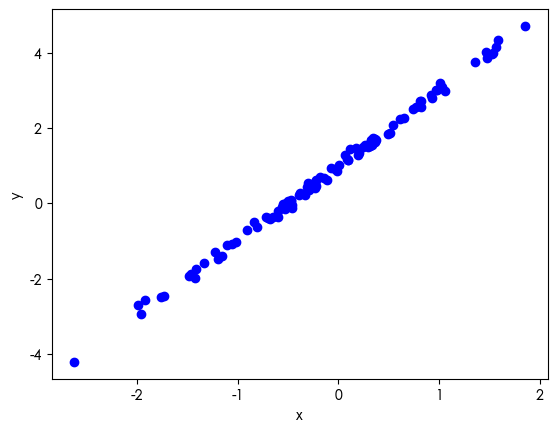

In [25]:
true_b = 1
true_w = 2
N = 100 # 生成的数据个数

np.random.seed(42) # 指定随机数种子
x = np.random.randn(N,1)
# print(x)
noise = (0.1 * np.random.randn(N,1)) # 噪音数据
y = true_b + true_w *x + noise

# 数据展示
plt.scatter(x, y, c='b')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 2. 数据拆分 
训练数据：0.8
验证数据：0.2

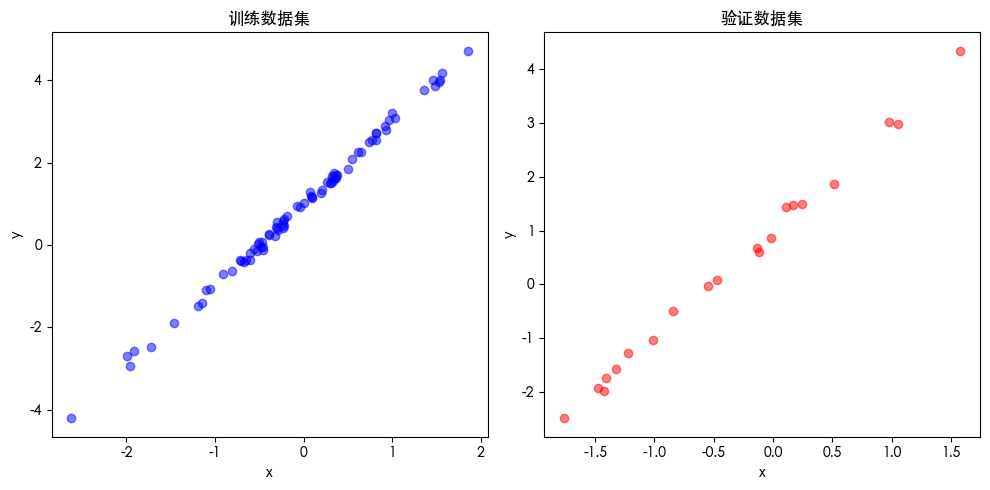

In [26]:
idx = np.arange(N)
np.random.shuffle(idx) # 打乱顺序 模拟shuffle

# 使用前80个索引进行训练
train_idx = idx[:int(N*0.8)]
# 使用剩余的索引进行验证
val_idx = idx[int(N*0.8):]

# 生成训练集和验证集
x_train,y_train = x[train_idx],y[train_idx]
x_val,y_val = x[val_idx],y[val_idx]

# 数据展示
fig,axs = plt.subplots(1,2,figsize=(10,5))
axs[0].scatter(x_train,y_train,c='b',alpha=0.5)
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].set_title('训练数据集')
axs[1].scatter(x_val,y_val,c='r',alpha=0.5)
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].set_title('验证数据集')
plt.tight_layout()  # 自动调整子图间距
plt.show()

## 3. 随机初始化
随机初始化参数/权重

In [32]:
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)
print(b,w)

[0.49671415] [-0.1382643]


## 4. 计算模型的预测

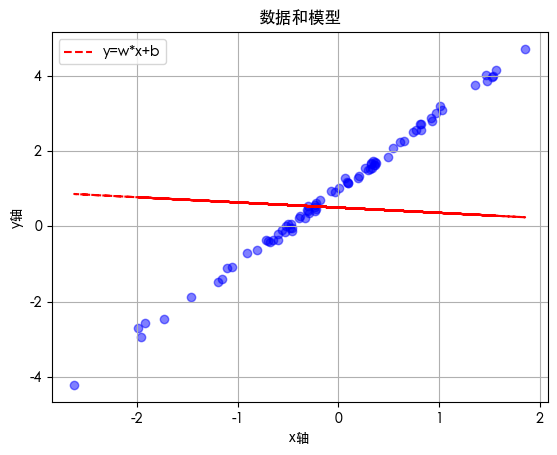

In [35]:
yhat = b + w*x_train

# 展示训练数据和模型（一条直线）
plt.scatter(x_train,y_train,c='b',alpha=0.5) # 训练数据 散点图
plt.plot(x_train,yhat,c='r',linestyle='--',label='y=w*x+b') # 模型
# 添加标题和标签
plt.title("数据和模型")
plt.xlabel('x轴')
plt.ylabel('y轴')

# 显示图例和网格
plt.legend()
plt.grid(True)

# 显示图形
plt.show()

## 5. 计算损失

In [36]:
error = (yhat - y_train)
# 计算均方误差（MSE）
loss = (error ** 2).mean()
print(loss)

3.7179647226555472


## 6. 计算梯度

In [38]:
# 计算参数b和w的梯度
b_grad = 2 * error.mean()
w_grad = 2 * (x_train*error).mean()
print(b_grad,w_grad)

-0.8243776245169204 -3.300964765423804


## 7. 更新参数

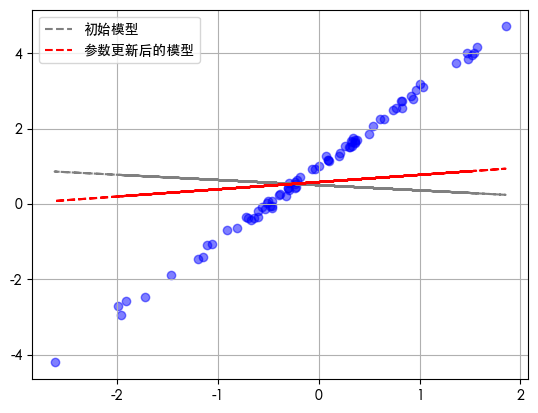

In [39]:
# 设置学习率
lr = 0.1

# 绘制数据和模型
plt.scatter(x_train,y_train,c='b',alpha=0.5)
yhat = w*x_train+b
plt.plot(x_train,yhat,c='gray',linestyle='--',label='初始模型')

# 使用梯度和学习率更新参数
b = b - lr * b_grad
w = w - lr * w_grad
yhat = w*x_train+b
# 绘制更新后的模型
plt.plot(x_train,yhat,c='r',linestyle='--',label='参数更新后的模型')

plt.legend()
plt.grid(True)
plt.show()

 ## 8. 训练模型
 
重复 5-7步骤